In [1]:
library('Seurat')
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library(tibble)
library(SeuratDisk)
library('RColorBrewer')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [43]:
anno_col = list(
#     response_short = c(PRO = "rosybrown1", R = "lightgreen", '0' = 'gray95', PD = 'tomato'), 
#     treatment_group = c(ICI_PD1 = 'paleturquoise1', ICI_combo = 'turquoise', '0' = 'gray95'),
     sex = c(M = 'lightblue2', F = 'mistyrose'), 
     state = c(PRE = 'palegoldenrod', ON ='gold1', POST ='sandybrown'),
#      subtype = c(cutaneous = 'honeydew2', uveal = 'lightgoldenrodyellow', 
#                  mucosal = 'mistyrose2', 'unknown primary' = 'gray95'),
#      tissue = c(skin = 'lightskyblue1', breast = 'darkolivegreen3', liver = 'seagreen1',
#                  lymph = 'lightseagreen', brain = 'cyan', soft = 'steelblue1', colon = 'darkcyan',
#                 bone = 'seagreen3', '0' = 'gray95'),
    age = colorRampPalette(brewer.pal(4, "Blues")) (40),
    day = colorRampPalette(brewer.pal(4, "RdPu")) (40),
    pfs = colorRampPalette(brewer.pal(4, "Greys")) (40),
     ncells = colorRampPalette(brewer.pal(4, "Greens")) (40)  
               )

# Load data and metadata

In [5]:
takeda <- LoadH5Seurat("/net/bmc-lab5/data/kellis/group/Takeda_final/Takeda_single_cell/processed_data/takeda_CB_scfiltered_raw_select_samples_june22_2021_200mingenes6000_25mito_10cellspergene.h5seurat")


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [17]:
takeda

An object of class Seurat 
28295 features across 527123 samples within 1 assay 
Active assay: RNA (28295 features, 0 variable features)

In [3]:
takeda_celltyped <- LoadH5Seurat("/net/bmc-lab5/data/kellis/group/Takeda_final/Takeda_single_cell/processed_data/takeda_post_CB_raw_scfiltered_excluded_samples_200mingenes6000max_25mito_10cells_pergene_w_cell_type.h5seurat")
Emily_label <- takeda_celltyped@meta.data

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [52]:
Emily_label <- Emily_label %>% rownames_to_column('row')

## load annotation

In [23]:
annotation <- read.csv(file = '/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/scCancer_metadata.csv',
                       header= T)


In [38]:
 annotation <- annotation %>% filter(include == TRUE) %>%
            select(c('patient','uid','sample_ID_long',"age", "sex", "subtype", 
                                 "treatment_group",'prior_therapy', "state", "response",
                                 "tissue", 'day',"pfs"))

In [65]:
meta <- takeda@meta.data %>% rownames_to_column('row') %>%
    select(c('row','sample_ID','is_multiplet','cell_barcode','total_counts','percent_ribo',
             'percent_heme','n_genes')) %>%
    left_join(Emily_label, by = c('row','cell_barcode','sample_ID')) %>%
    left_join(annotation,by = 'sample_ID_long' ) %>%
    column_to_rownames('row')

In [71]:
head(meta)

,sample_ID,is_multiplet,cell_barcode,total_counts,percent_ribo,percent_heme,n_genes,compartment,general_cell_type,sample_ID_long,⋯,age,sex,subtype,treatment_group,prior_therapy,state,response,tissue,day,pfs
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
11992_CELL_2,11992,no,CATGCTCAGCATCCTA-1,31562,0.1281921,0,5751,Tumor,Tumor,D19-11992,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11992_CELL_5,11992,no,CATCAAGGTATTGAGA-1,27389,0.2000073,0,5362,Tumor,Tumor,D19-11992,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11992_CELL_6,11992,no,TAATTCCGTAGTCGTT-1,27302,0.1044612,0,5627,Tumor,Tumor,D19-11992,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11992_CELL_7,11992,no,AAAGTCCTCTCATTAC-1,27243,0.1235547,0,5419,Tumor,Tumor,D19-11992,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11992_CELL_9,11992,no,CAGAGCCCAGACTCTA-1,26827,0.1387408,0,5450,Tumor,Tumor,D19-11992,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11992_CELL_10,11992,no,ATTCAGGTCATCTCTA-1,26722,0.1603922,0,5451,Tumor,Tumor,D19-11992,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [69]:
takeda@meta.data <- meta

In [72]:
takeda <- takeda %>% subset(subset = uid %in% annotation$uid) %>%
        subset(subset = is_multiplet == 'no')

In [77]:
takeda

An object of class Seurat 
28295 features across 307976 samples within 1 assay 
Active assay: RNA (28295 features, 0 variable features)

## Cohort overview

In [64]:
library(pheatmap)
library(Matrix.utils)

In [90]:
PD1.level <- FetchData(takeda, 
                    vars = c('PDCD1','CTLA4'))
PD1.level <- aggregate.Matrix(PD1.level, 
            groupings = takeda@meta.data[, c("uid")], fun = "mean")

In [125]:
ncells <- takeda@meta.data %>% select(c('uid')) %>% group_by(uid) %>%
        summarize(ncells = n()) %>% column_to_rownames('uid')

In [127]:
annot <- annotation %>% column_to_rownames('uid') %>% 
    select (-c('sample_ID_long', 'patient'))
annot$ncells <- ncells[rownames(annot),]

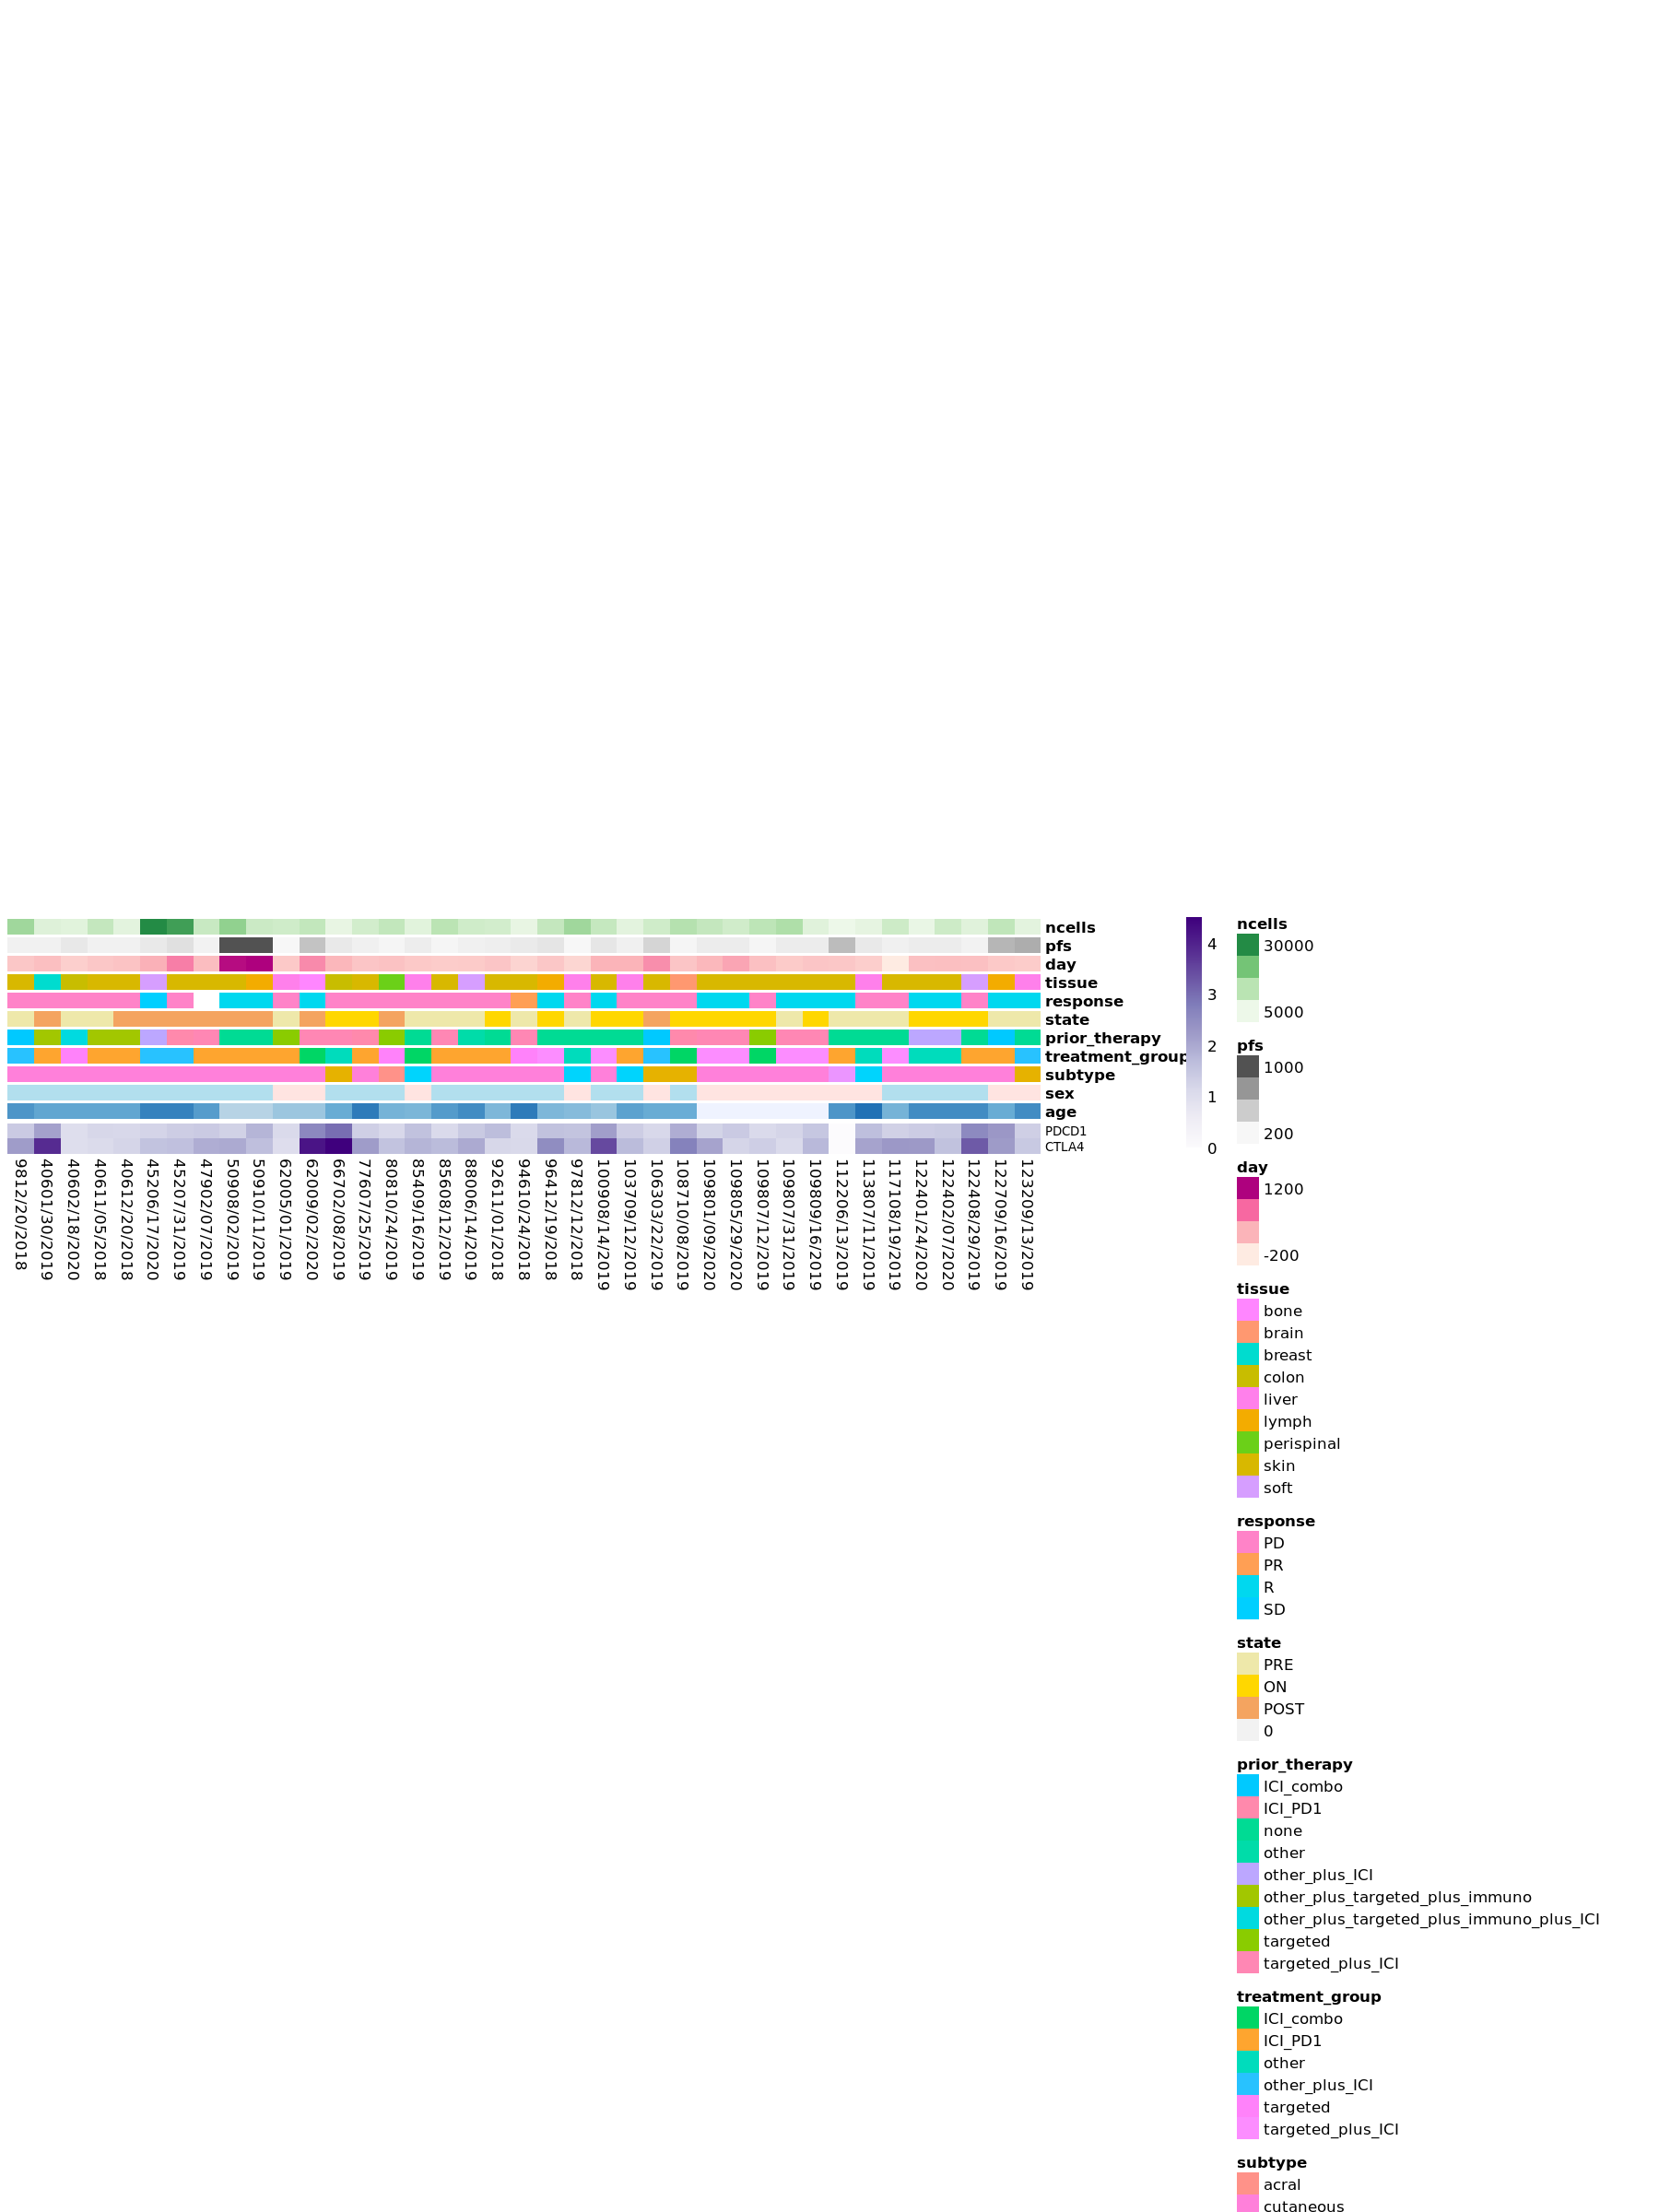

In [131]:
options(repr.plot.height = 20, repr.plot.width = 15)

pheatmap(t(PD1.level)[,rownames(annotation)], 
            color = colorRampPalette(brewer.pal(9, "Purples")) (255), 
             annotation_colors =anno_col, 
             cluster_rows = F,
             cluster_cols = F,
             show_rownames = T,
             annotation_col = annot, 
             fontsize = 10, 
             fontsize_row = 8, 
         cellheight = 10, 
         height = 20,
#          filename = "./../../data-lab5/scRNA/master_cohort/scRNA_cohort_overview.pdf"
         )

# QC

In [1]:
takeda <- readRDS('/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_postQC010322.rds')

In [5]:
# store mitochondrial percentage in object meta data
takeda <- PercentageFeatureSet(takeda, pattern = "^MT-", col.name = "percent_mt")

In [132]:
# takeda <- takeda %>% subset(subset = percent_mt <10) 

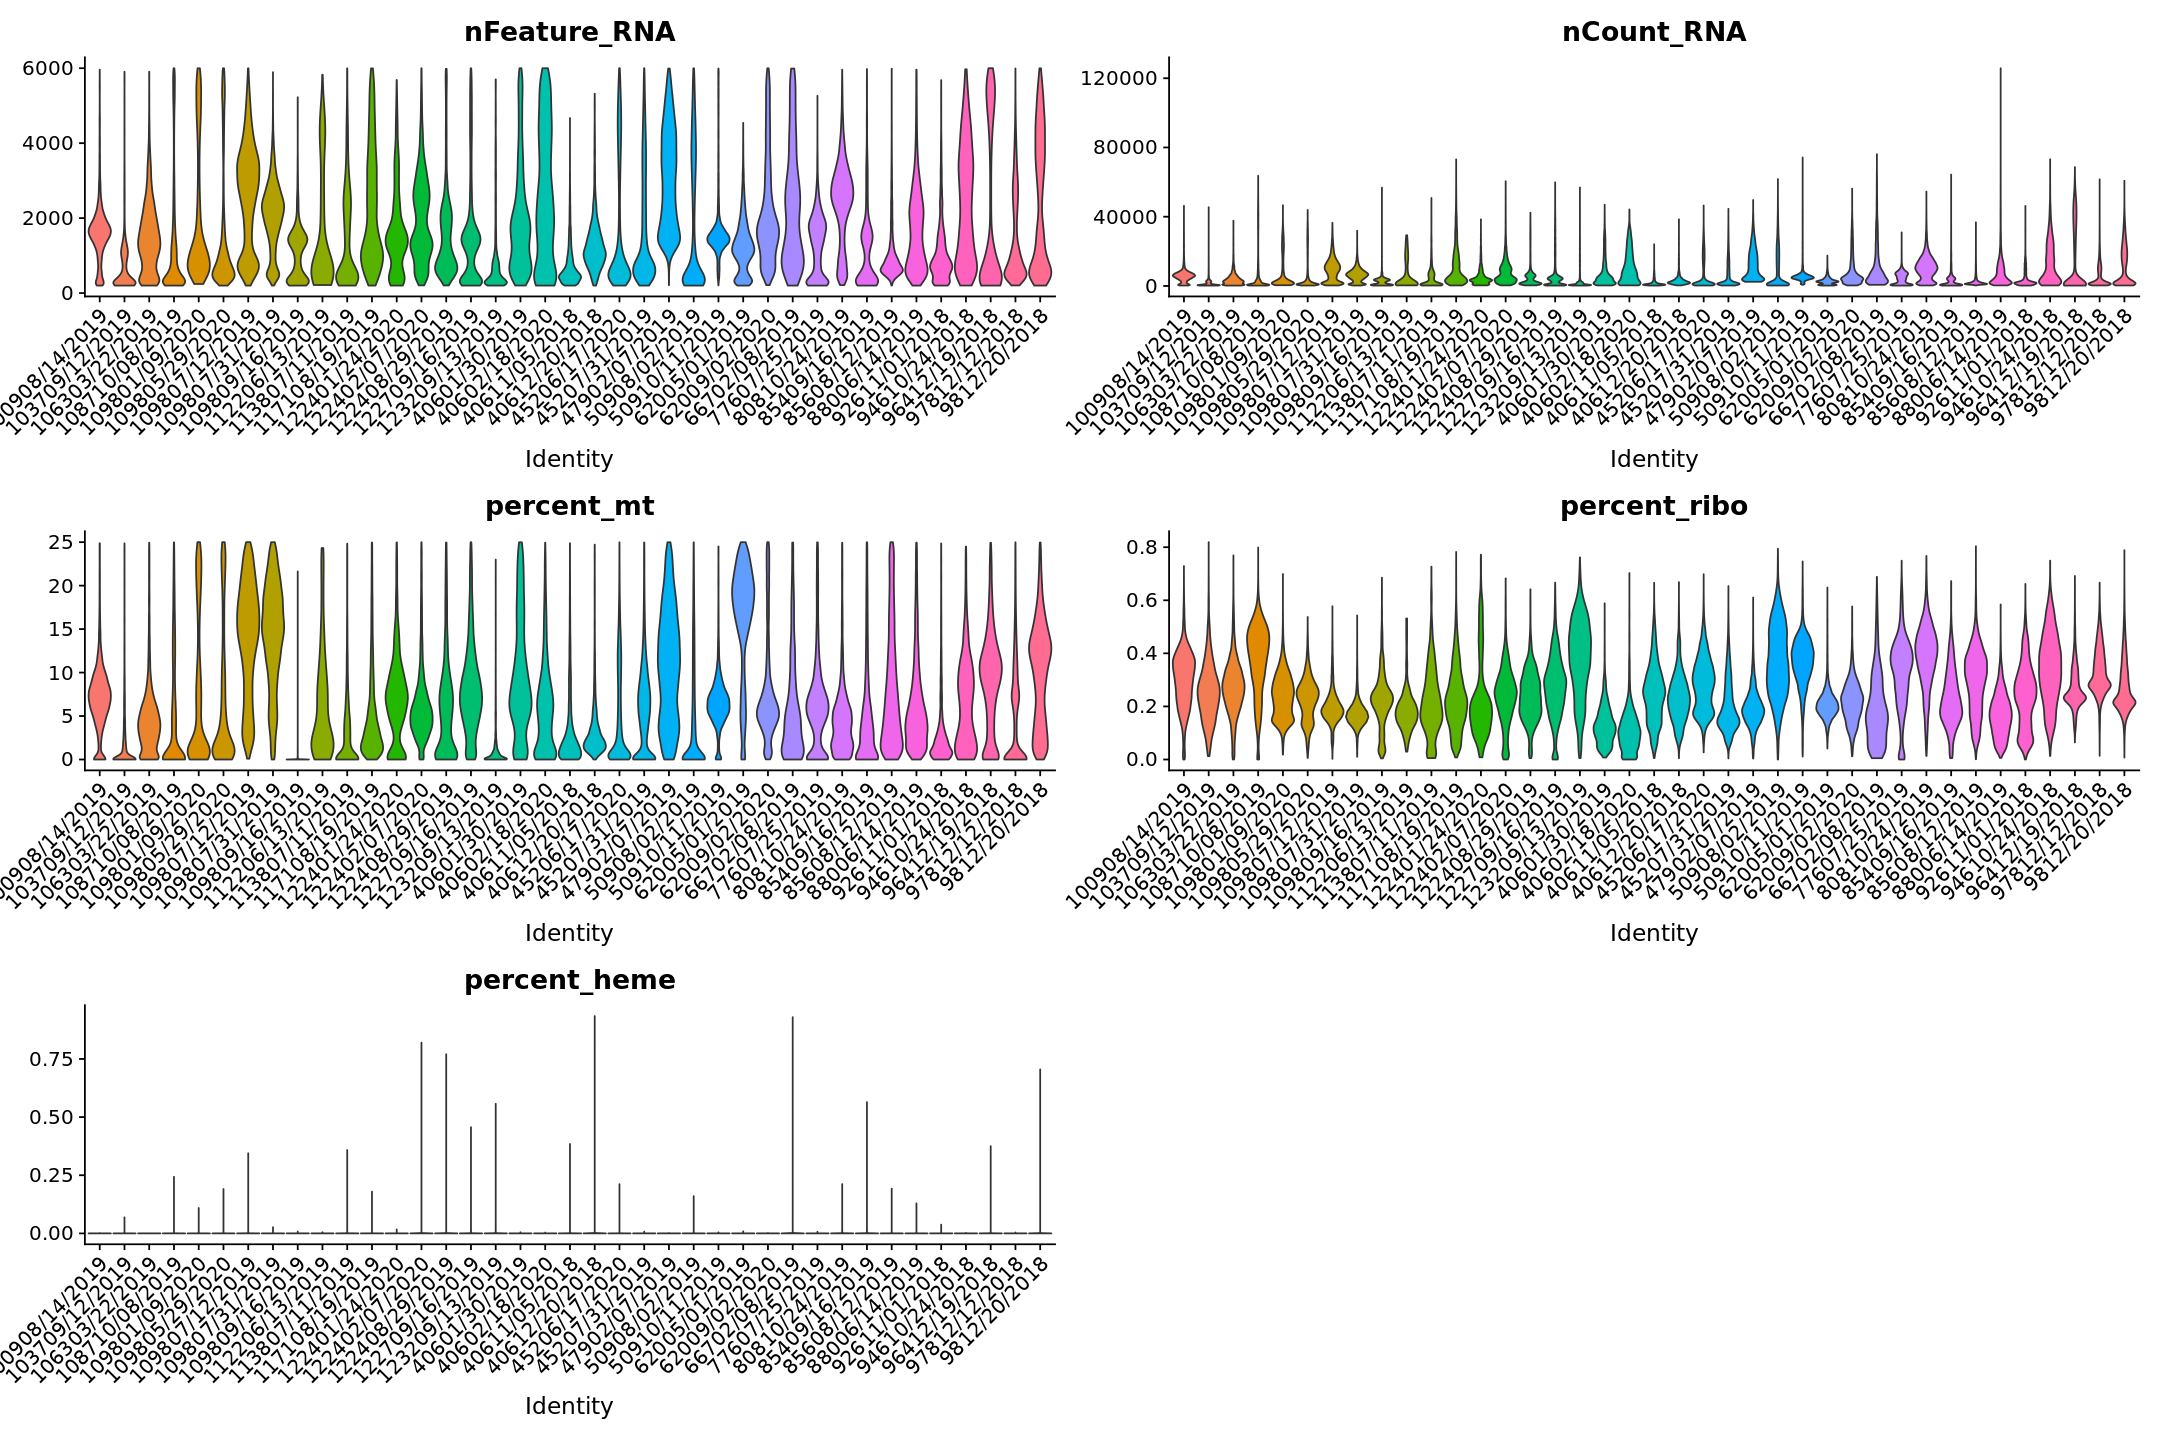

In [6]:
feats <- c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_ribo", "percent_heme")

options(repr.plot.height = 12, repr.plot.width = 18)

VlnPlot(takeda, group.by = "uid", features = feats, pt.size = 0, ncol = 2) + 
    NoLegend()

# SCTransform

In [134]:
# run sctransform
takeda<- SCTransform(takeda, vars.to.regress = "percent_mt", verbose = FALSE)

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warnin

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

#  PCA, UMAP

In [135]:
takeda <- RunPCA(takeda, verbose = FALSE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



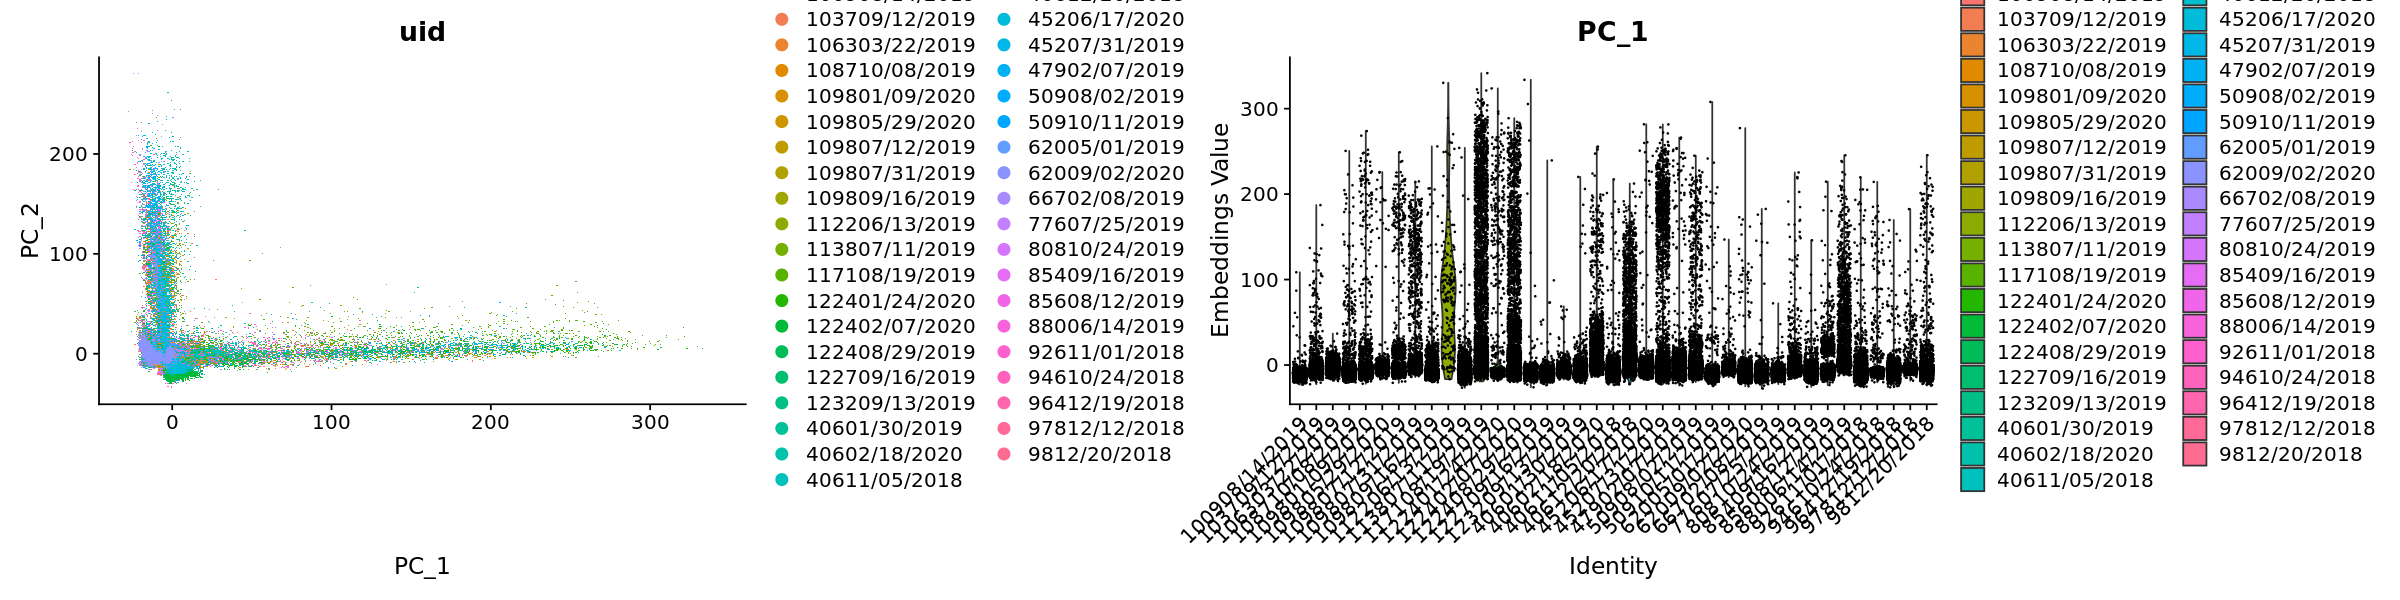

In [138]:
options(repr.plot.height = 5, repr.plot.width = 20)
p1 <- DimPlot(object = takeda, reduction = "pca", pt.size = .1, group.by = "uid")
p2 <- VlnPlot(object = takeda, features = "PC_1", group.by = "uid", pt.size = .1)
p1+p2

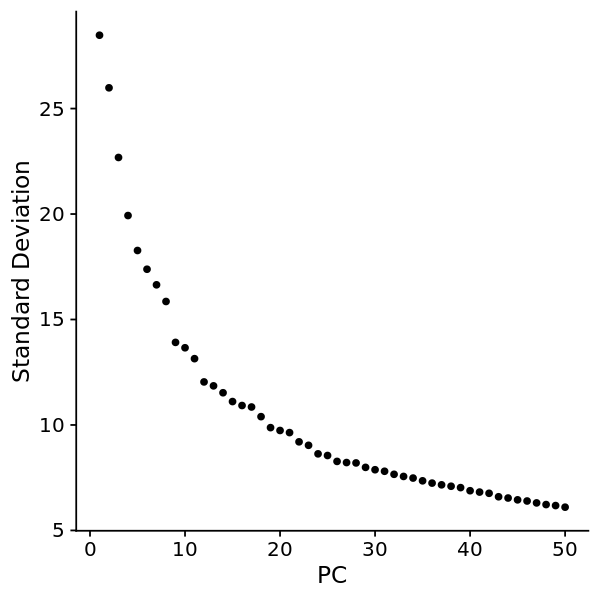

In [139]:
options(repr.plot.height = 5, repr.plot.width = 5)

ElbowPlot(takeda, ndims = 50)

In [140]:
takeda

An object of class Seurat 
56004 features across 222351 samples within 2 assays 
Active assay: SCT (27709 features, 3000 variable features)
 1 other assay present: RNA
 1 dimensional reduction calculated: pca

In [141]:
takeda <- RunUMAP(takeda, dims = 1:30, verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



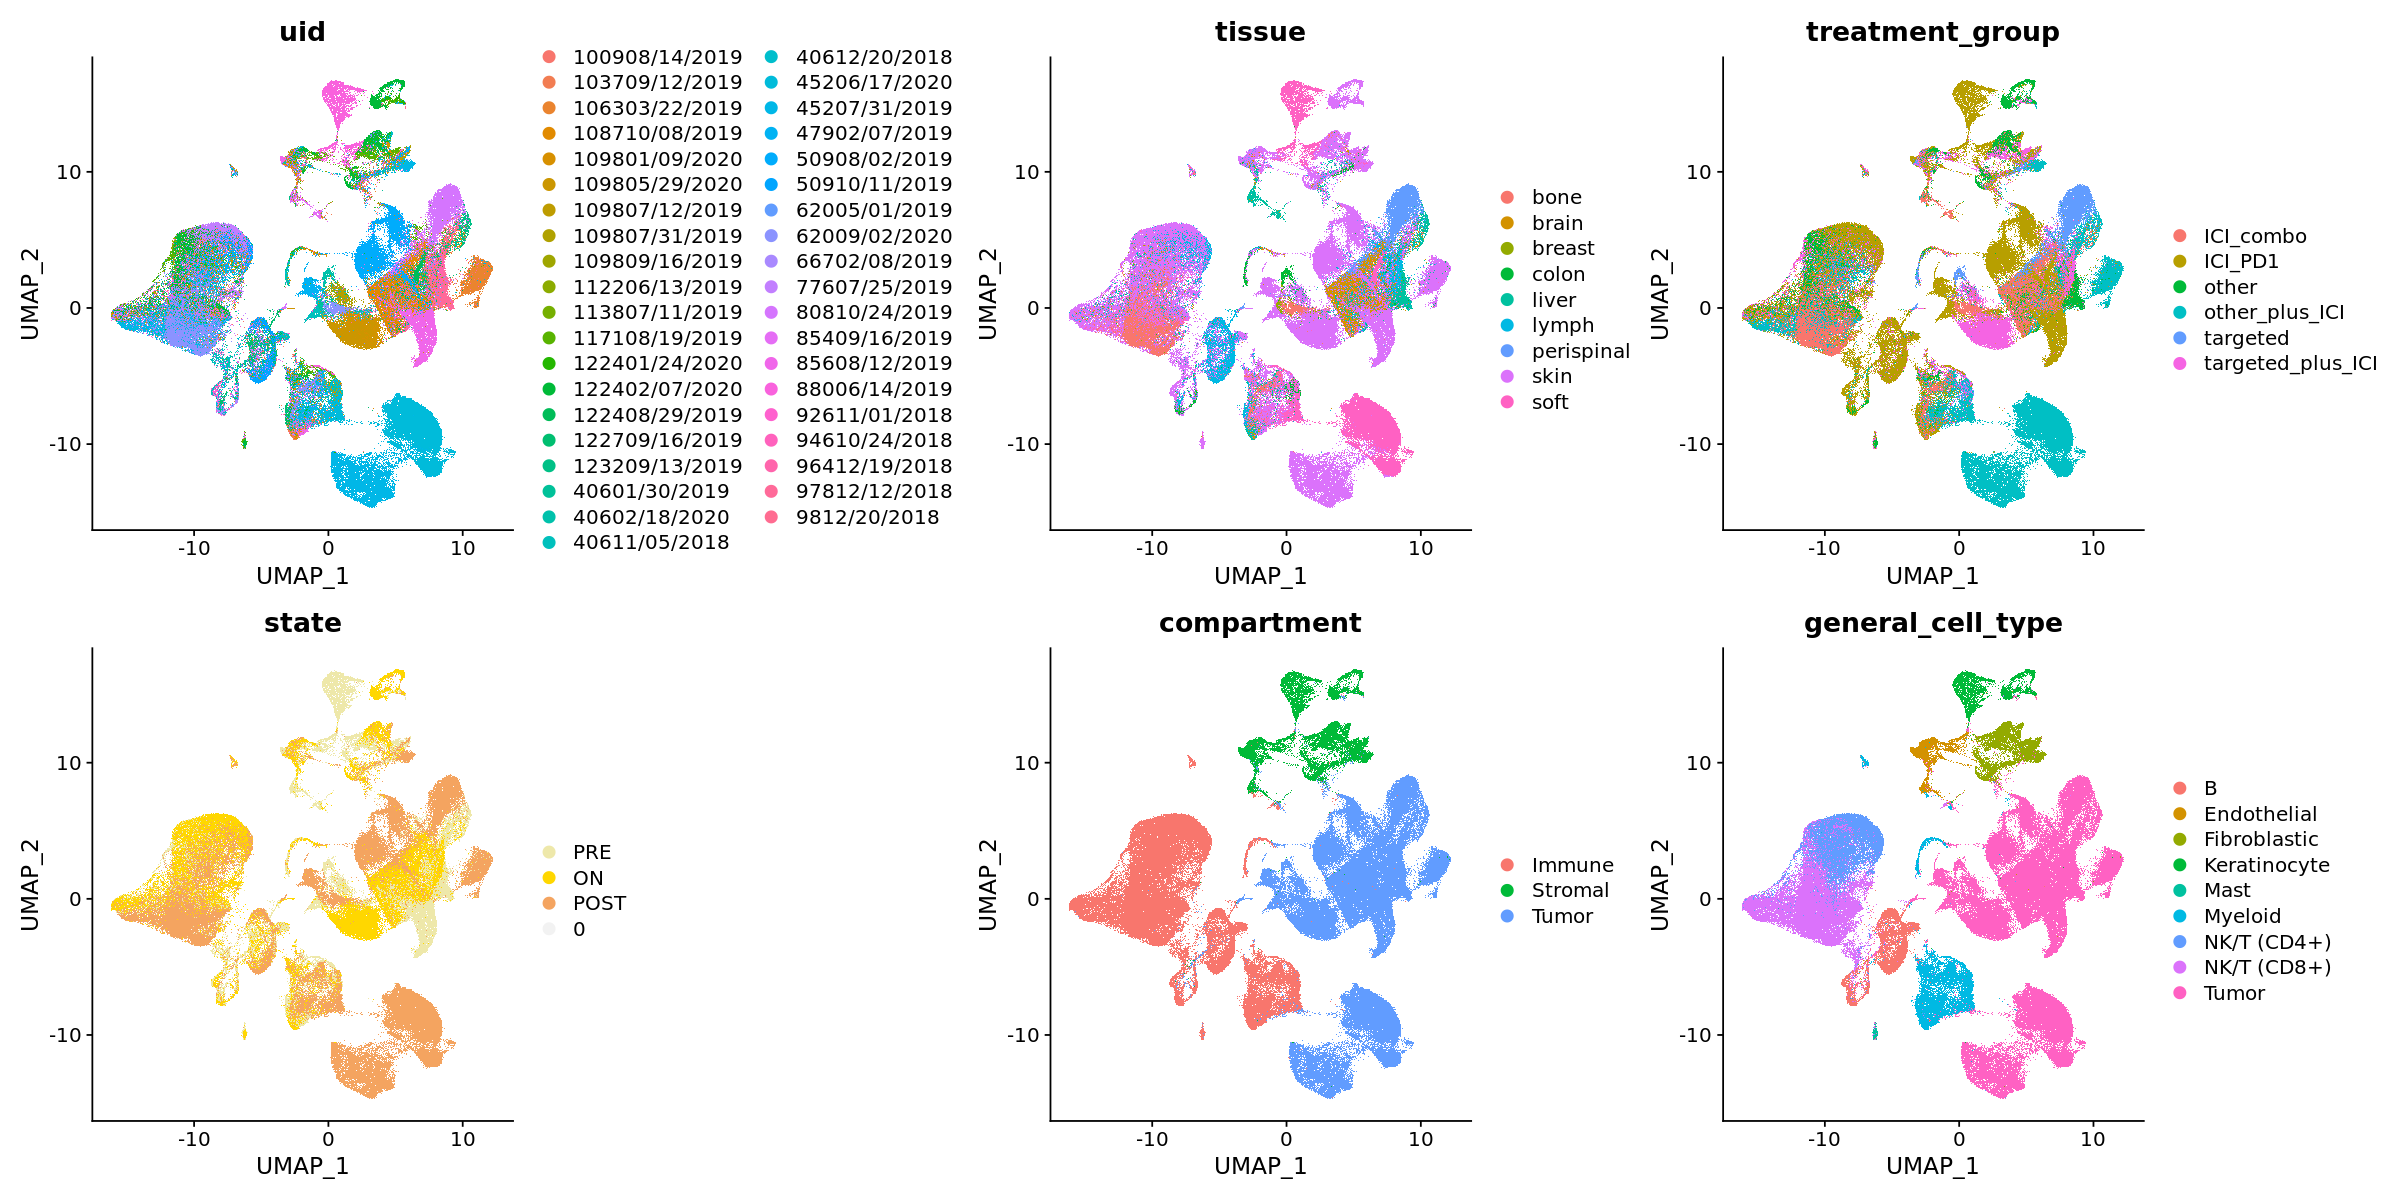

In [144]:
options(repr.plot.height = 10, repr.plot.width = 20)

p1 <- DimPlot(takeda, reduction = "umap", group.by = "uid",   
              label.size = 3, repel = TRUE)
p2 <- DimPlot(takeda, reduction = "umap", group.by = "tissue",  cols =anno_col$tissue ,
              label.size = 3, repel = TRUE)
p3 <- DimPlot(takeda, reduction = "umap", group.by =  "treatment_group",  cols =anno_col$treatment_group , 
              label.size = 3, repel = TRUE)
p4 <- DimPlot(takeda, reduction = "umap", group.by =  "state",  cols =anno_col$state , 
              label.size = 3, repel = TRUE)
p5 <- DimPlot(takeda, reduction = "umap", group.by =  "compartment",  
              label.size = 3, repel = TRUE)
p6 <- DimPlot(takeda, reduction = "umap", group.by =  "general_cell_type", 
              label.size = 3, repel = TRUE)


p1+p2+p3+p4+p5+p6

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



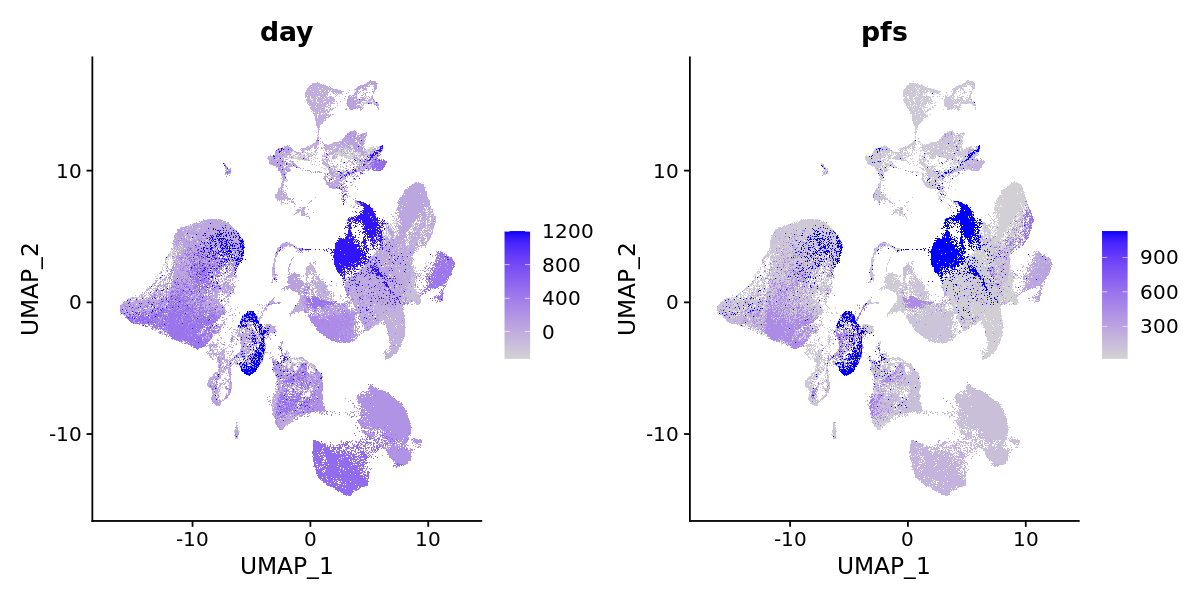

In [147]:
options(repr.plot.height = 5, repr.plot.width = 10)
FeaturePlot(takeda, features = c('day','pfs') , ncol = 2,
            reduction = "umap", )

## cell cycle scoring

In [4]:
takeda <- CellCycleScoring(takeda, s.features = cc.genes$s.genes, g2m.features = cc.genes$g2m.genes)


Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



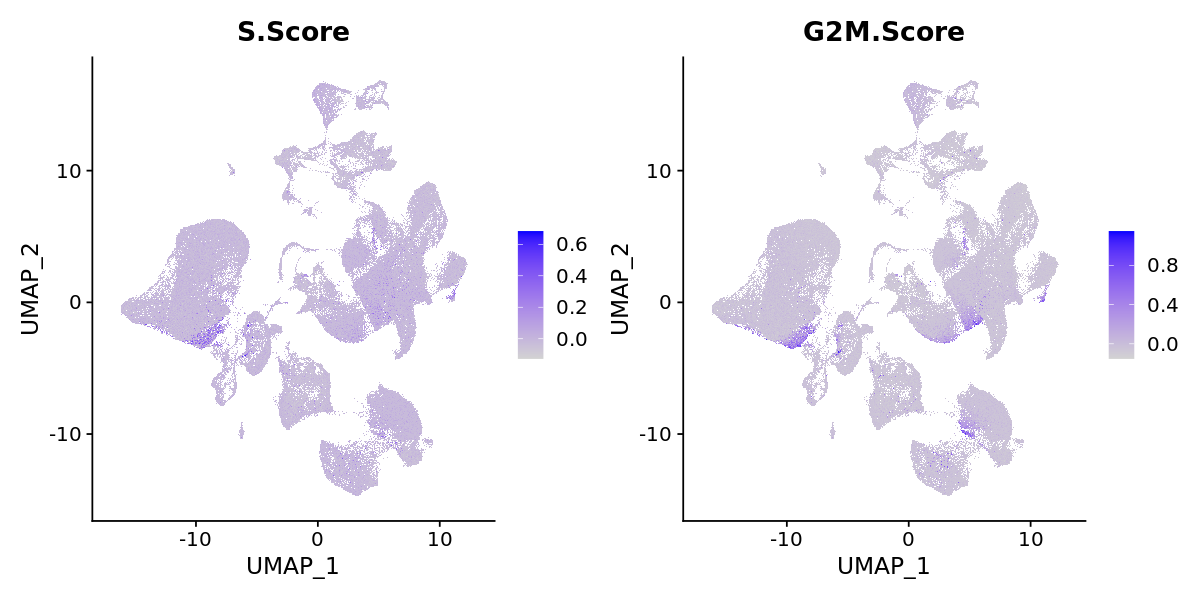

In [6]:
options(repr.plot.height = 5, repr.plot.width = 10)
FeaturePlot(takeda, features = c('S.Score','G2M.Score') , ncol = 2,
            reduction = "umap", )

# reassign cell type

In [19]:
meta.orig <- takeda[[]]
meta <- takeda[[]]

In [26]:
meta$reannotated.cell.type <- as.character(meta$general_cell_type)

In [21]:
unique(meta$general_cell_type)

[1] B            Myeloid      Endothelial  Fibroblastic NK/T (CD8+) 
[6] Tumor        Keratinocyte NK/T (CD4+)  Mast        
9 Levels: B Endothelial Fibroblastic Keratinocyte Mast Myeloid ... Tumor

In [28]:
meta <- meta %>% 
       mutate(reannotated.cell.type = case_when(
             general_cell_type == 'NK/T (CD4+)' & G2M.Score > 0.5 ~ 'Cycling T',
             general_cell_type == 'NK/T (CD8+)' & G2M.Score > 0.5 ~ 'Cycling T', 
             general_cell_type == 'B' & G2M.Score > 0.5 ~ 'Cycling B', 
             TRUE ~ reannotated.cell.type))

In [57]:
obj  <- readRDS("//net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_cDC021022.rds")
# obj  <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_SCT_RPCAintegrated_mono_macro021022.rds")


In [58]:
meta[rownames(obj[[]]),]$reannotated.cell.type <- 'cDC'


In [59]:
unique(meta$reannotated.cell.type)

[1] "B"                   "Monocyte/Macrophage" "Endothelial"        
 [4] "cDC"                 "Fibroblastic"        "NK/NKT"             
 [7] "Myeloid"             "CD8 T"               "Tumor"              
[10] "Keratinocyte"        "CD4 T"               "Treg"               
[13] "Mast"                "Cycling T"           "Cycling B"

In [61]:
meta <- meta %>% 
       mutate(reannotated.cell.type = case_when(
             reannotated.cell.type == 'Myeloid'  ~ 'pDC',
             TRUE ~ reannotated.cell.type))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



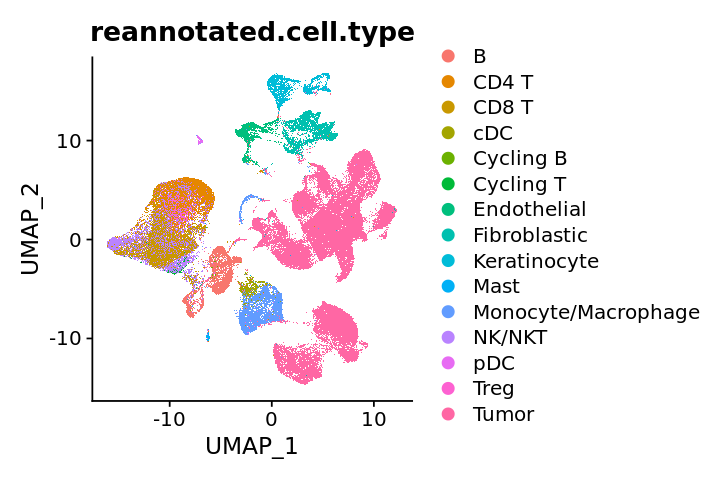

In [62]:
takeda@meta.data <- meta
options(repr.plot.height = 4, repr.plot.width = 6)

DimPlot(takeda, reduction = "umap", group.by =  "reannotated.cell.type", 
              label.size = 3, repel = TRUE)

In [63]:
saveRDS(takeda, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_010322.rds")


# making pseudo bulk

In [66]:
pseudobulk_mx <- aggregate.Matrix(t(GetAssayData(takeda, slot = "counts")), 
                       groupings = takeda@meta.data[, c("uid", "reannotated.cell.type")], fun = "sum") 

In [68]:
pseudobulk_df <- as.data.frame(pseudobulk_mx) %>% t()

In [70]:
write.csv(pseudobulk_df,
          file = '/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/39samples_pseudobulk_sum0202222.csv' , row.names = TRUE)

In [73]:
pseudobulk_meta <- meta[c('patient','uid','sample_ID_long',"age", "sex", "subtype", 
                                 "treatment_group",'prior_therapy', "state", "response",
                                 "tissue", 'day',"pfs")] %>%  distinct()
write.csv(pseudobulk_meta,
          file = '/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/39samples_pseudobulk_meta0202222.csv' , row.names = TRUE)

# cell type fractions

In [7]:
library('data.table')


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
takeda <- readRDS( "/net/bmc-lab5/data/kellis/users/ruiwenfu/scRNA/metastatic_all/takeda_39metastaticSamples_mt10_010322.rds")


In [11]:
celltype_counts <- takeda@meta.data[c('uid', 'compartment' )] %>% 
    count(uid, compartment) %>% 
    spread( key = uid, value = n)%>%
    replace(., is.na(.), 0)  %>%
    column_to_rownames('compartment')

In [14]:
cellFrac <- celltype_counts%>%t() %>% as.data.frame 
srow <- rowSums(cellFrac)
cellFrac <- cellFrac/srow 

In [16]:
annot <- takeda@meta.data[c('uid','treatment_group','prior_therapy',
                             'state','response','day','pfs')] %>% 
    unique %>%
    arrange(match(uid, rownames(cellFrac)))

In [18]:
cellFrac <- cbind(cellFrac,annot) 

In [24]:
cellFrac_long <- cellFrac %>% 
    melt(id.vars = c('uid','treatment_group','prior_therapy',
                             'state','response','day','pfs'), variable.name = "compartment",
         value.name = "cellFrac")

cellFrac_long$cellFrac <- round(cellFrac_long$cellFrac,2)
cellFrac_long$state <- factor(cellFrac_long$state, levels = c('PRE','ON', 'POST'))

Warning message in melt(., id.vars = c("uid", "treatment_group", "prior_therapy", :
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”


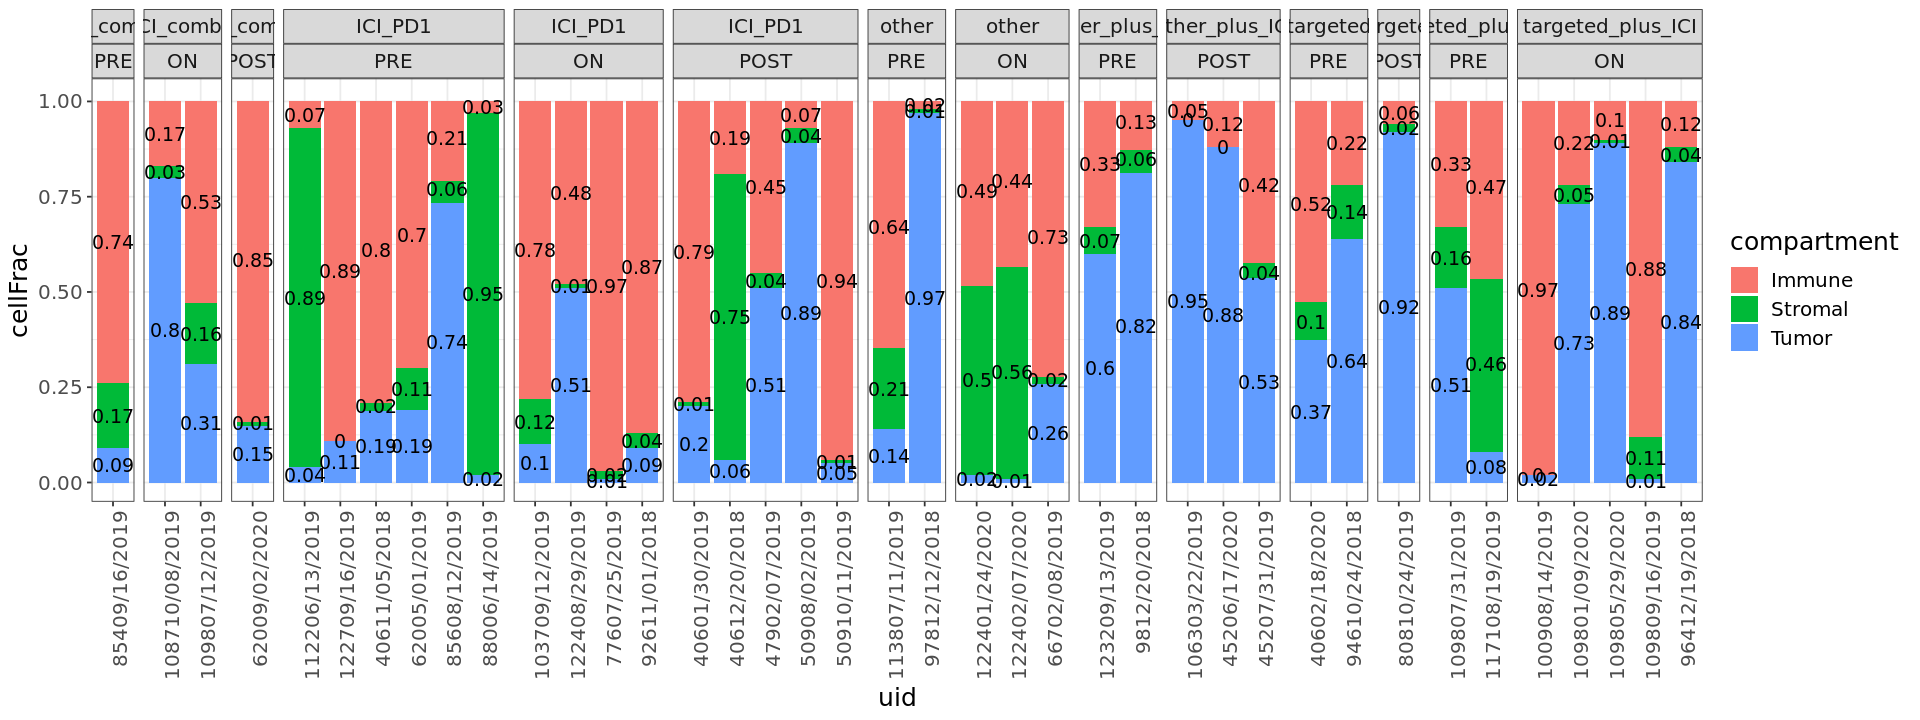

In [41]:
options(repr.plot.width=16, repr.plot.height=6)

cellFrac_long %>% 
    ggplot( aes(fill=compartment, y=cellFrac, x=uid, label= cellFrac)) + 
    geom_bar(position="fill", stat="identity") + 
    facet_grid(~  treatment_group+state, scales = "free", space = "free") +
    geom_text(size = 4, position = position_stack(vjust = 0.5))+
    theme_bw() +
    theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

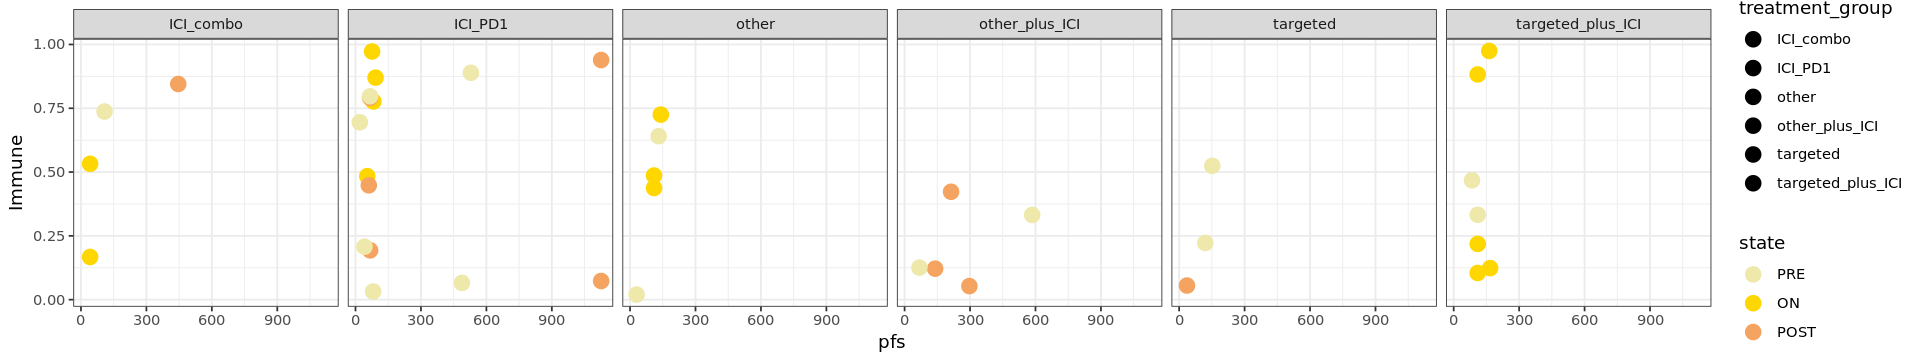

In [45]:
options(repr.plot.width=16, repr.plot.height=3)

cellFrac%>% 
    ggplot( aes(fill=treatment_group, y=Immune, x=pfs)) + 
    geom_point(aes(colour = state),size = 4) +
    facet_grid(~treatment_group)+theme_bw()+ 
scale_color_manual(values=anno_col$state)